In [1]:
# Load python modules

import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
# Connect google colab to your google drive.
# Note that you need to be logged in to your google account for this step to work
USING_COLAB = True # change this to false if you're working on a local machine

if USING_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = pd.read_csv('/content/drive/MyDrive/comp1804_coursework_dataset_23-24.csv')
df = pd.DataFrame(X)
df.head(5)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough


In [4]:
df.shape

(9347, 8)

EDA on the data set

In [5]:
print(df.isna().sum())

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64


In [6]:
# how many duplicates?
print(df.duplicated().sum())

print()

215



In [7]:
df = df.drop_duplicates()

filling up missing value in the text clarity column

In [8]:
df['category'] = df['category'].dropna()

<ipython-input-8-74ba2fa1af21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].dropna()


In [9]:
df.head(106)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
101,3219003433,These arguments often center on what it means ...,ORG_YES_PRODUCT_NO_PERSON_YES_,56,17.0,woman,philosophy,NaN
102,694781102764,Prof Henry Norris Russell ForMemRS HFRSE FRAS ...,ORG_YES_PRODUCT_NO_PERSON_YES_,47,15.0,man,NaN,NaN
103,323165008762,Binney was part of a close Manchester social c...,ORG_YES_PRODUCT_NO_PERSON_YES_,37,7.0,woman,biographies,NaN
104,7628004101,"With its rich set of operators, the C language...",ORG_YES_PRODUCT_NO_PERSON_NO_,49,12.0,man,programming,NaN


In [10]:
print(df.isna().sum())

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9123
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9132 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9132 non-null   int64  
 1   paragraph           9132 non-null   object 
 2   has_entity          9132 non-null   object 
 3   lexicon_count       9132 non-null   int64  
 4   difficult_words     9114 non-null   float64
 5   last_editor_gender  9132 non-null   object 
 6   category            9071 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 642.1+ KB


In [12]:
# 1. Imputer
from sklearn.impute import SimpleImputer
imptr_example = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# 2. Fit the imputer object to the feature matrix
imptr_example = imptr_example.fit(df[['difficult_words']])


# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df[['difficult_words']] = imptr_example.transform(
    df[['difficult_words']])



# check the column has no more missing values:
print(df['difficult_words'].isna().sum())

0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9132 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9132 non-null   int64  
 1   paragraph           9132 non-null   object 
 2   has_entity          9132 non-null   object 
 3   lexicon_count       9132 non-null   int64  
 4   difficult_words     9132 non-null   float64
 5   last_editor_gender  9132 non-null   object 
 6   category            9071 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 642.1+ KB


In [14]:
df.describe()

,par_id,lexicon_count,difficult_words
count,9.132000e+03,9132.000000,9132.000000
mean,3.571119e+11,82.039422,21.537744
std,3.220610e+11,63.456144,16.297682
min,8.500328e+07,0.000000,0.000000
25%,7.019601e+10,33.000000,9.000000
50%,2.684380e+11,64.000000,17.000000
75%,6.124310e+11,117.000000,30.000000
max,1.058779e+12,653.000000,143.000000


In [15]:
# let's list all categorical features
categorical_columns= ['has_entity', 'last_editor_gender', 'category', 'text_clarity']


# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(df[col].value_counts())
  print()

Categories and number of occurrences for 'has_entity'
ORG_YES_PRODUCT_NO_PERSON_YES_     2996
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_NO_PRODUCT_NO_PERSON_YES_      1349
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64

Categories and number of occurrences for 'last_editor_gender'
man                  6103
woman                2412
non-binary            352
prefer_not_to_say     265
Name: last_editor_gender, dtype: int64

Categories and number of occurrences for 'category'
biographies                             2886
philosophy                              2511
programming                             1938
artificial intelligence                 1527
movies about artificial intelligence     162
Philosophy                                13
Biographies               

cleaning missing data

In [16]:
df.loc[df.category=='Biographies','category'] = 'biographies'
df.loc[df.category=='Philosophy','category'] = 'philosophy'
df.loc[df.category=='Programming','category'] = 'programming'
df.loc[df.category=='Artificial intelligence','category'] = 'artificial intelligence'
df.loc[df.category=='Movies about artificial intelligence','category'] = 'movies about artificial intelligence'


In [17]:
accepted_has_entity = ['ORG_YES_PRODUCT_NO_PERSON_YES_','ORG_NO_PRODUCT_NO_PERSON_NO_','ORG_YES_PRODUCT_NO_PERSON_NO_','ORG_NO_PRODUCT_NO_PERSON_YES_ ','ORG_YES_PRODUCT_YES_PERSON_YES_', 'ORG_YES_PRODUCT_YES_PERSON_NO_','ORG_NO_PRODUCT_YES_PERSON_YES_', 'ORG_NO_PRODUCT_YES_PERSON_NO_']
df.loc[df.has_entity.map(lambda x: x not in accepted_has_entity),'has_entity'] = np.nan

In [18]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(df[col].value_counts())
  print()

Categories and number of occurrences for 'has_entity'
ORG_YES_PRODUCT_NO_PERSON_YES_     2996
ORG_NO_PRODUCT_NO_PERSON_NO_       2793
ORG_YES_PRODUCT_NO_PERSON_NO_      1448
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: has_entity, dtype: int64

Categories and number of occurrences for 'last_editor_gender'
man                  6103
woman                2412
non-binary            352
prefer_not_to_say     265
Name: last_editor_gender, dtype: int64

Categories and number of occurrences for 'category'
biographies                             2899
philosophy                              2524
programming                             1948
artificial intelligence                 1537
movies about artificial intelligence     163
Name: category, dtype: int64

Categories and number of occurrences for 'text_clarity'
clear_enough        5
not_clear_enough    4
Name: text_clarity, d

Data Exploration

([0, 1, 2, 3, 4],
 [Text(0, 0, 'biographies'),
  Text(1, 0, 'artificial intelligence'),
  Text(2, 0, 'programming'),
  Text(3, 0, 'philosophy'),
  Text(4, 0, 'movies about artificial intelligence')])

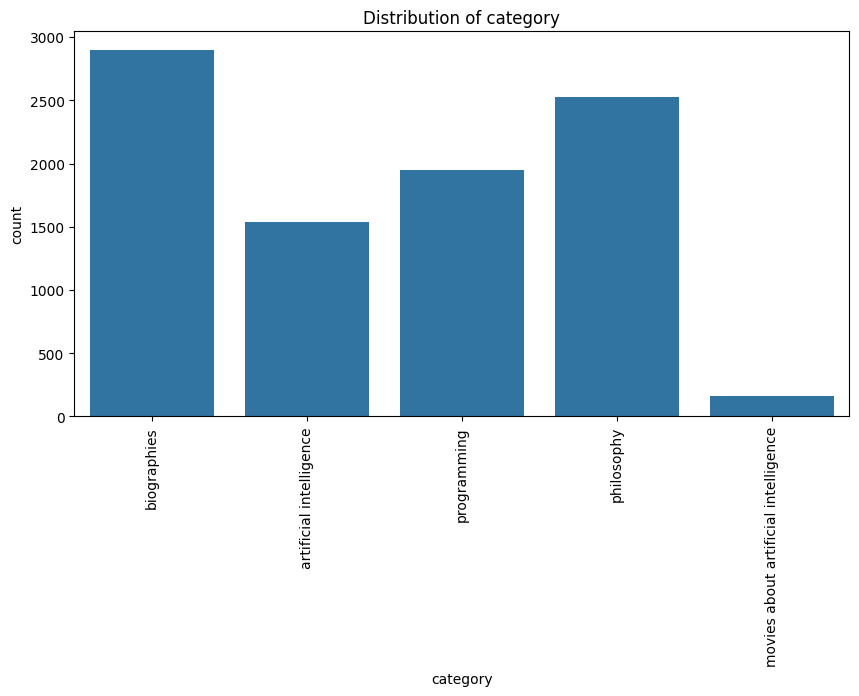

In [19]:

_ = plt.figure(figsize=(10, 5))
sns.countplot(x='category', data=df)
plt.title('Distribution of category')
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Distribution of last_editor_gender')

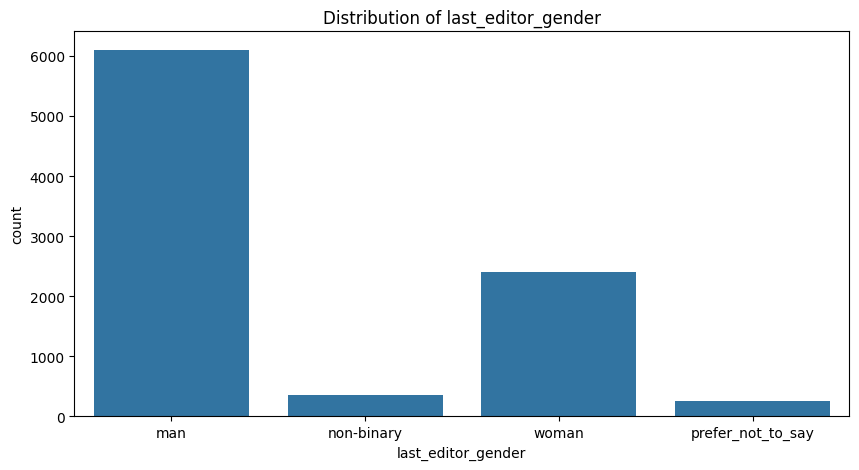

In [20]:
_ = plt.figure(figsize=(10, 5))
sns.countplot(x='last_editor_gender', data=df)
plt.title('Distribution of last_editor_gender')


filling mising values

In [21]:
# 1. Imputer
from sklearn.impute import SimpleImputer
imptr_example = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# 2. Fit the imputer object to the feature matrix
imptr_example = imptr_example.fit(df[['category']])


# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
df[['category']] = imptr_example.transform(
    df[['category']])


# check the column has no more missing values:
print(df['category'].isna().sum())

0


Data Spliting

In [22]:
# split the dataset
df_train, df_test = train_test_split(df, test_size = 0.2,
                                     shuffle=True, random_state=0)
train_category_label = df_train['category'].copy()
test_category_label = df_test['category'].copy()

# Droping the labels from the training and testing data
df_train = df_train.drop(['category', 'text_clarity'], axis=1)
df_test = df_test.drop(['category', 'text_clarity'], axis=1)



In [23]:
train_category_label = pd.DataFrame(train_category_label, columns=['category'])
test_category_label = pd.DataFrame(test_category_label, columns=['category'])


In [24]:
train_categorical_columns = ['has_entity', 'last_editor_gender']

Encoding the categorical features

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# define the transformation
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply
            train_categorical_columns, #-->columns to apply it to
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False
)

# the output is an ARRAY with the encoded columns.
encoded_array= ct_cat.fit_transform(df_train)

# What if we want a dataframe back? We can combine the array with the info about
# the column names stored in ct.get_feature_names_out()
encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)

df_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

print()
print(df_train.head(5))


['has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_' 'has_entity_nan'
 'last_editor_gender_man' 'last_editor_gender_non-binary'
 'last_editor_gender_prefer_not_to_say' 'last_editor_gender_woman'
 'par_id' 'paragraph' 'lexicon_count' 'difficult_words']

  has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     1.0   

  has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                

Encoding the test data categoritical features

In [26]:
# the output is an ARRAY with the encoded columns.
encoded_test_array= ct_cat.fit_transform(df_test)

# What if we want a dataframe back? We can combine the array with the info about
# the column names stored in ct.get_feature_names_out()
encoded_test_col_names= ct_cat.get_feature_names_out()
print(encoded_test_col_names)

df_test= pd.DataFrame(encoded_test_array, columns=encoded_test_col_names)

print()
print(df_test.head(5))


['has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_'
 'has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_' 'has_entity_nan'
 'last_editor_gender_man' 'last_editor_gender_non-binary'
 'last_editor_gender_prefer_not_to_say' 'last_editor_gender_woman'
 'par_id' 'paragraph' 'lexicon_count' 'difficult_words']

  has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

  has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                

Lebel encoding

In [27]:
# First check: what are the target categories?
print(train_category_label['category'].value_counts())
print()
print(train_category_label['category'].isna().sum())


biographies                             2368
philosophy                              1976
programming                             1563
artificial intelligence                 1263
movies about artificial intelligence     135
Name: category, dtype: int64

0


In [28]:
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()
# apply LblEncoder object to our training variables
lblEncoder_X = lblEncoder_X.fit(train_category_label)
train_category_label = lblEncoder_X.transform(train_category_label)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [29]:

print(test_category_label['category'].value_counts())

biographies                             592
philosophy                              548
programming                             385
artificial intelligence                 274
movies about artificial intelligence     28
Name: category, dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_T = LabelEncoder()
# apply LblEncoder object to our target variables
test_category_label = lblEncoder_T.fit_transform(test_category_label)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
df_train.head(5)

,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,has_entity_nan,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman,par_id,paragraph,lexicon_count,difficult_words
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83427006011,The first Fortran compiler set a high standard...,68,21.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,307919001820,There are different generalisations of this th...,50,16.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141864007020,Object – The Object data type is defined by th...,51,11.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,66883005709,"According to the Duke of Windsor, the experie...",100,24.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,417462009479,"It will coin much faster, with greater ease, w...",141,15.0


In [32]:
df_train.shape

(7305, 16)

Appling Normalization Feature scaling on our numerical dataset

In [33]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max_num=MinMaxScaler()

df_train['difficult_words']=min_max_num.fit_transform(df_train[['difficult_words']])
df_train['lexicon_count']=min_max_num.fit_transform(df_train[['lexicon_count']])

print(df_train[['difficult_words']].head(5))
print()
print(df_train[['lexicon_count']].head(5))


   difficult_words
0         0.146853
1         0.111888
2         0.076923
3         0.167832
4         0.104895

   lexicon_count
0       0.104135
1       0.076570
2       0.078101
3       0.153139
4       0.215926


In [34]:
df_test['difficult_words']=min_max_num.fit_transform(df_test[['difficult_words']])
df_test['lexicon_count']=min_max_num.fit_transform(df_test[['lexicon_count']])

print(df_test[['difficult_words']].head(5))
print()
print(df_test[['lexicon_count']].head(5))


   difficult_words
0         0.133929
1         0.071429
2         0.223214
3         0.169643
4         0.214286

   lexicon_count
0         0.0975
1         0.2225
2         0.2925
3         0.1525
4         0.1425


In [35]:
# a) How many columns do we have now in the dataset? How many were there originally?
# your code here
print( len(df_train.columns))


16


lets tokonize our training dataset

In [36]:
%%capture
# we use %%capture to suppress the output. Comment the line above if you're working on local machine
# install spacy
!pip install --upgrade spacy
!python -m spacy download en_core_web_sm
!pip install clean-text


In [37]:
import spacy
from cleantext import clean

In [38]:
from cleantext import clean

def clean_text(x):
  """ Define standard cleaning procedure """
  return clean(x,
    fix_unicode=True,               # fix various unicode errors
    lower=True,                     # change all text to lowercase
    no_line_breaks=True,           # this removes occurrences of the newline character "\n"
    no_punct=False,                 # let's NOT remove punctuations for the time being
    no_urls=True,                  # replace all URLs with a special token (below)
    replace_with_url="",          # we decide to replace urls with nothing
    no_emails=True,                # replace all email addresses with a special token
    replace_with_email="",        # we decide to replace emails with nothing
    no_phone_numbers=True,         # replace all phone numbers with a special token
    replace_with_phone_number="",   # we decide to replace phone numbers with nothing
    lang="en"                       # set to 'de' for German special handling
    )




In [39]:
df_train['clean_text']= df_train['paragraph'].apply(clean_text)
df_test['clean_text']= df_test['paragraph'].apply(clean_text)
df_train.head(10)

,has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_,has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_,has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_,has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_,has_entity_ORG_YES_PRODUCT_YES_PERSON_NO_,has_entity_ORG_YES_PRODUCT_YES_PERSON_YES_,has_entity_nan,last_editor_gender_man,last_editor_gender_non-binary,last_editor_gender_prefer_not_to_say,last_editor_gender_woman,par_id,paragraph,lexicon_count,difficult_words,clean_text
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83427006011,The first Fortran compiler set a high standard...,0.104135,0.146853,the first fortran compiler set a high standard...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,307919001820,There are different generalisations of this th...,0.076570,0.111888,there are different generalisations of this th...
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141864007020,Object – The Object data type is defined by th...,0.078101,0.076923,object the object data type is defined by the ...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,66883005709,"According to the Duke of Windsor, the experie...",0.153139,0.167832,"according to the duke of windsor, the experien..."
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,417462009479,"It will coin much faster, with greater ease, w...",0.215926,0.104895,"it will coin much faster, with greater ease, w..."
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,531004002482,User Research: Conduct research to understand...,0.045942,0.083916,user research: conduct research to understand ...
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30012000517,A argument is a way to persuade someone of som...,0.053599,0.055944,a argument is a way to persuade someone of som...
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,196502007383,Criticism of Pascal's wager began soon after i...,0.094946,0.167832,criticism of pascal's wager began soon after i...
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,725259011229,AutoHotkey is a free and open-source custom sc...,0.104135,0.195804,autohotkey is a free and open-source custom sc...
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,291687008538,It took 35 years after taking her first photog...,0.257274,0.244755,it took 35 years after taking her first photog...


Lets tokenize the text

In [40]:
# let's create a nice function to tokenize a single text document
import string
EXTRA_PUNCT = string.punctuation

# import Spacy
import spacy
# create the Spacy pipeline
nlp = spacy.load('en_core_web_sm')

def preprocess_text_with_spacy(text_):
  """
  This function takes a Spacy doc and returns the list of its lemmas,
  after removing stop words and punctuations
  """

  doc_ = nlp(text_)
  # here we take the lemmas, and now we also want to but only keep those that are NOT stop words, only digits, or punctuation.
  lemmas_ = [token.lemma_ for token in doc_ if not (token.is_stop or token.is_punct or token.is_digit)]
  # remember when I said punctuation is tricky?
  # Spacy misses some characters that we want to remove that can also be considered punctuation (= and +)
  # Here is where we remove them
  return [lemma for lemma in lemmas_ if lemma not in EXTRA_PUNCT]


In [41]:
# tokenize training data
# (use the cleaned text!)
from time import time as tt
t0 = tt()
df_train['tokenized_text'] = df_train['clean_text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')
print(df_train.head(3))

Time elapsed is 200.29 seconds
  has_entity_ORG_NO_PRODUCT_NO_PERSON_NO_  \
0                                     0.0   
1                                     0.0   
2                                     1.0   

  has_entity_ORG_NO_PRODUCT_YES_PERSON_NO_  \
0                                      0.0   
1                                      0.0   
2                                      0.0   

  has_entity_ORG_NO_PRODUCT_YES_PERSON_YES_  \
0                                       0.0   
1                                       0.0   
2                                       0.0   

  has_entity_ORG_YES_PRODUCT_NO_PERSON_NO_  \
0                                      0.0   
1                                      0.0   
2                                      0.0   

  has_entity_ORG_YES_PRODUCT_NO_PERSON_YES_  \
0                                       1.0   
1                                       0.0   
2                                       0.0   

  has_entity_ORG_YES_PRODUCT_YES_PERSON_

In [42]:
# tokenize test data (start from the cleaned text!)
t0 = tt()
df_test['tokenized_text'] = df_test['clean_text'].apply(preprocess_text_with_spacy)
print(f'Time elapsed is {(tt()-t0):.2f} seconds')


Time elapsed is 42.94 seconds


Machine Learning Model

In [43]:
# Preparation
import warnings
warnings.simplefilter("ignore") # for GridSearchCV: some of its combination throws warning which is fine (they are not appropriate combination)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.metrics import balanced_accuracy_score
from time import time as tt

In [44]:
# create custom class to add to the pipeline
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    ''' Pipeline step to transform a sparse matrix into a dense one '''
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()


Creating a machine learning pipeline with balance data

In [45]:
# Create the pipeline
clf_ = Pipeline(
        steps =[

                 ('vectorizer', TfidfVectorizer(lowercase=False,
                                          tokenizer=lambda x: x)),

                ('to_dense', DenseTransformer()),
              ('classifier', SGDClassifier(random_state=0)),
      ]
    )


hyper parameters

In [46]:
# Set up the hyper-parameters to test
parameters = {'vectorizer__max_features': (2000,5000,25000),
              'vectorizer__ngram_range': [(1,1), (1,2)],
              'classifier__penalty': ['l1', 'l2'],
             }



In [47]:
# let's compare how many features we get in total when using only unigrams, or also bigrams and then also trigrams
for ngram_range in [(1,1), (1,2), (1,3)]:
  vec= TfidfVectorizer(ngram_range=ngram_range, lowercase=False, tokenizer=lambda x: x).fit(df_train['tokenized_text'])
  print(f'With ngram range {ngram_range} we get a vocabulary of size: {len(vec.vocabulary_)}')


With ngram range (1, 1) we get a vocabulary of size: 28004
With ngram range (1, 2) we get a vocabulary of size: 271648
With ngram range (1, 3) we get a vocabulary of size: 557051


Perform a CV search to get the best hyper parameter

In [48]:
# create the GridSearch function
# original data
clf_search = GridSearchCV(clf_, parameters, scoring= "accuracy", cv= 5) #we can use accuracy here since the dataset is balanced

# Fit all the possible hyper-parameters combinations using cross-validation.
# It may take some time: be patient
# original data
# let's also time it (it's goint to take time, nothing's wrong!)
t0 = tt()
_ =clf_search.fit(df_train['tokenized_text'], train_category_label)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')



Time taken to train gridsearch: 1221.89 seconds.


In [49]:
#original data
print(clf_search.best_score_, clf_search.best_params_)

print()


0.9286789869952088 {'classifier__penalty': 'l2', 'vectorizer__max_features': 25000, 'vectorizer__ngram_range': (1, 2)}



In [50]:
# original data
clf_cv_results = pd.DataFrame(clf_search.cv_results_)


In [51]:
# let's show the dataframe
print(clf_cv_results[['mean_test_score'] + [t for t in clf_cv_results.columns if 'param' in t]])

    mean_test_score param_classifier__penalty param_vectorizer__max_features  \
0          0.900342                        l1                           2000   
1          0.898836                        l1                           2000   
2          0.911020                        l1                           5000   
3          0.908830                        l1                           5000   
4          0.909651                        l1                          25000   
5          0.909788                        l1                          25000   
6          0.905818                        l2                           2000   
7          0.903765                        l2                           2000   
8          0.920192                        l2                           5000   
9          0.918412                        l2                           5000   
10         0.927036                        l2                          25000   
11         0.928679                     

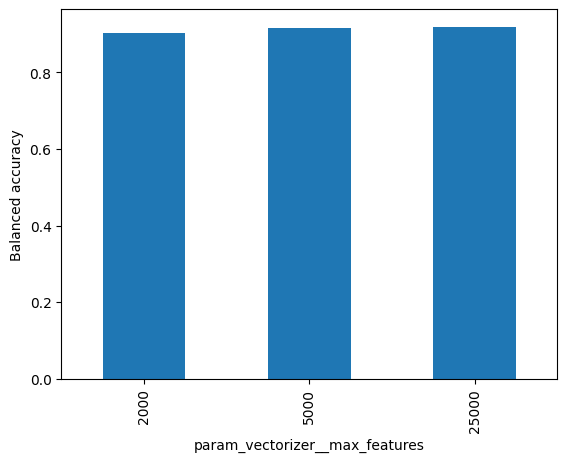

In [52]:
# we can plot the average crossed validated score for one individual hyper-parameter
# groupby groups together all the rows with the same value of the hyper-parameter of interest
df_group= clf_cv_results.groupby('param_vectorizer__max_features')
# we average the cross validated score for each different value of the hyper-parameter
avg_score = df_group.mean_test_score.agg('mean')
# we plot the results
ax =avg_score.plot(kind='bar')
_ =plt.ylabel('Balanced accuracy')


In [53]:
# Get the best estimator for further analysis of the results using the test set
# Does it still perform well?
best_clf = clf_search.best_estimator_


Evaluation

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       274
           1       0.94      0.92      0.93       592
           2       0.93      1.00      0.97        28
           3       0.92      0.92      0.92       548
           4       0.94      0.99      0.96       385

    accuracy                           0.94      1827
   macro avg       0.94      0.95      0.94      1827
weighted avg       0.94      0.94      0.94      1827



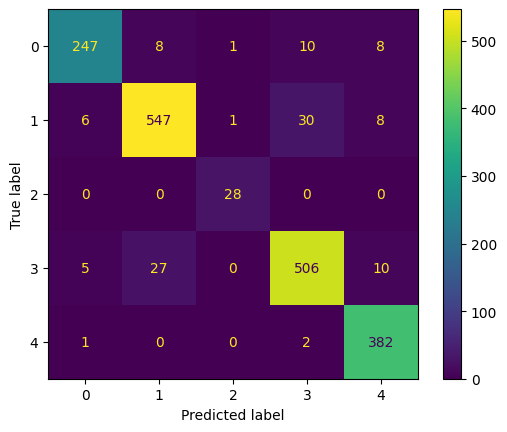

In [54]:
# Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(df_test['tokenized_text'])
print(classification_report(test_category_label, y_pred))

cm= ConfusionMatrixDisplay.from_estimator(best_clf, df_test['tokenized_text'], test_category_label)


compared with a trivial baseline

              precision    recall  f1-score   support

           0       0.16      0.21      0.18       274
           1       0.32      0.20      0.25       592
           2       0.01      0.14      0.02        28
           3       0.28      0.20      0.23       548
           4       0.19      0.17      0.18       385

    accuracy                           0.19      1827
   macro avg       0.19      0.18      0.17      1827
weighted avg       0.25      0.19      0.21      1827



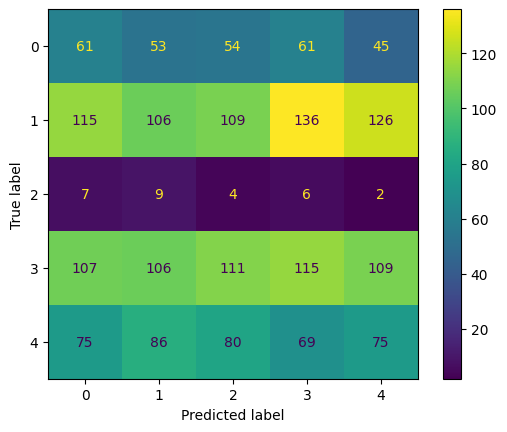

In [55]:
from sklearn.dummy import DummyClassifier
trivial_clf = DummyClassifier(strategy="uniform")
trivial_clf.fit(df_train['tokenized_text'], train_category_label)

y_trivial = trivial_clf.predict(df_test['tokenized_text'])
print(classification_report(test_category_label, y_trivial))

cm= ConfusionMatrixDisplay.from_estimator(trivial_clf, df_test['tokenized_text'], test_category_label)


Comparism with a different Hyper Parameter

Time taken to train gridsearch: 498.26 seconds.
    mean_test_score param_classifier__alpha param_vectorizer__max_features  \
0          0.882820                       0                           2000   
1          0.885558                       0                           2000   
2          0.883094                       0                           5000   
3          0.890623                       0                           5000   
4          0.883915                       0                          25000   
5          0.899384                       0                          25000   
6          0.897604                       1                           2000   
7          0.898563                       1                           2000   
8          0.909925                       1                           5000   
9          0.909514                       1                           5000   
10         0.914853                       1                          25000   
11         0.918

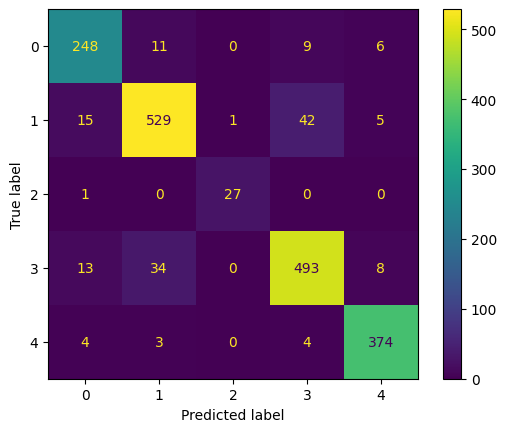

In [56]:
from sklearn.naive_bayes import MultinomialNB
clf_ = Pipeline(
        steps =[('vectorizer', CountVectorizer(lowercase= False, tokenizer =lambda x: x)),
                ('to_dense', DenseTransformer()),
              ('classifier', MultinomialNB()),
      ]
    )

# let's define the parameters to try
parameters = {'vectorizer__ngram_range': ((1,1),(1,2)),
              'vectorizer__max_features': (2000,5000,25000),
              'classifier__alpha': [0, 1],
             }

# create the GridSearch function
# original data
clf_search = GridSearchCV(clf_, parameters, scoring= "accuracy", cv= 5)

# Fit all the possible hyper-parameters combinations using cross-validation: it may take some time
# original data
# let's also time it
t0 = tt()
_ =clf_search.fit(df_train['tokenized_text'], train_category_label)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')

clf_cv_results = pd.DataFrame(clf_search.cv_results_)
#let's show the dataframe
print(clf_cv_results[['mean_test_score'] + [t for t in clf_cv_results.columns if 'param' in t]])

# Get the best estimator for further analysis of the results using the test set
best_clf = clf_search.best_estimator_

# Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(df_test['tokenized_text'])
print(classification_report(test_category_label, y_pred))

cm= ConfusionMatrixDisplay.from_estimator(best_clf, df_test['tokenized_text'], test_category_label)



machine learning for the text clarity label

In [72]:
# Define a function to determine text clarity based on specific criteria
def determine_text_clarity(paragraph, has_entity, lexicon_count, difficult_words, last_editor_gender):


    if  difficult_words <= 30:
            return "clear_enough"

    else:
        return "not_clear_enough"


# Create a new column for labels ('text_clarity') and fill it with randomly generated labels
subset_data = df.head(n=100)

# Apply the function to create a new column for labels ('text_clarity') based on the determined clarity
subset_data['text_clarity'] = subset_data.apply(lambda row: determine_text_clarity(
                                  row['paragraph'], row['has_entity'], row['lexicon_count'],
                                      row['difficult_words'], row['last_editor_gender']), axis=1)

# Update the 'text_clarity' column in your original DataFrame with the labels from the subset
df.update(subset_data['text_clarity'])
df.to_csv('labeled_data.csv', index=False)
subset_data.to_csv('subset_data.csv', index=False)



In [58]:
subset_data['text_clarity'].value_counts()

clear_enough        76
not_clear_enough    24
Name: text_clarity, dtype: int64

In [59]:
subset_data.head(5)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough


In [60]:
subset_data=subset_data.drop(columns= 'lexicon_count')
subset_data=subset_data.drop(columns= 'difficult_words')
subset_data=subset_data.drop(columns= 'last_editor_gender')
subset_data=subset_data.drop(columns= 'category')
subset_data=subset_data.drop(columns= 'par_id')


encoding

In [61]:
ct_has = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(), # --> main function to apply
            ["has_entity"], #-->columns to apply it to
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False
)

# the output is an ARRAY with the encoded columns.
encoded_array= ct_has.fit_transform(subset_data)

# What if we want a dataframe back? We can combine the array with the info about
# the column names stored in ct.get_feature_names_out()
encoded_col_names= ct_has.get_feature_names_out()


subset_data= pd.DataFrame(encoded_array, columns=encoded_col_names)




In [62]:
# create an object of the LabelEncoder class
lblEncoder_Y = LabelEncoder()
# apply LblEncoder object to our training variables
lblEncoder_Y = lblEncoder_Y.fit(subset_data['text_clarity'])
clarity_label = lblEncoder_Y.transform(subset_data['text_clarity'])


In [63]:
subset_data['clean_text']= subset_data['paragraph'].apply(clean_text)
subset_data['tokenized_text'] = subset_data['clean_text'].apply(preprocess_text_with_spacy)

In [64]:
subset_data=subset_data.drop(columns= 'paragraph')
subset_data=subset_data.drop(columns= 'text_clarity')
subset_data=subset_data.drop(columns= 'clean_text')

Machine Learining pipeline

In [65]:
# Step 2: Building a Prototype
# Extract relevant features from the text data
X = subset_data
y = clarity_label

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
clf_search = GridSearchCV(clf_, parameters, scoring= "accuracy", cv= 5) #we can use accuracy here since the dataset is balanced

# Fit all the possible hyper-parameters combinations using cross-validation.
# It may take some time: be patient
# original data
# let's also time it (it's goint to take time, nothing's wrong!)
t0 = tt()
_ =clf_search.fit(X_train['tokenized_text'], y_train)
print(f'Time taken to train gridsearch: {tt()-t0:.2f} seconds.')


Time taken to train gridsearch: 0.85 seconds.


In [67]:
print(clf_search.best_score_, clf_search.best_params_)


0.625 {'classifier__alpha': 1, 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 2)}


In [68]:
clf_cv_results = pd.DataFrame(clf_search.cv_results_)


In [69]:
#let's show the dataframe
print(clf_cv_results[['mean_test_score'] + [t for t in clf_cv_results.columns if 'param' in t]])

    mean_test_score param_classifier__alpha param_vectorizer__max_features  \
0            0.4875                       0                           2000   
1            0.5250                       0                           2000   
2            0.4875                       0                           5000   
3            0.4750                       0                           5000   
4            0.4875                       0                          25000   
5            0.4750                       0                          25000   
6            0.5625                       1                           2000   
7            0.6250                       1                           2000   
8            0.5625                       1                           5000   
9            0.5500                       1                           5000   
10           0.5625                       1                          25000   
11           0.5500                       1                     

In [70]:
# Get the best estimator for further analysis of the results using the test set
# Does it still perform well?
best_clf = clf_search.best_estimator_


              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.40      1.00      0.57         2

    accuracy                           0.85        20
   macro avg       0.70      0.92      0.74        20
weighted avg       0.94      0.85      0.88        20



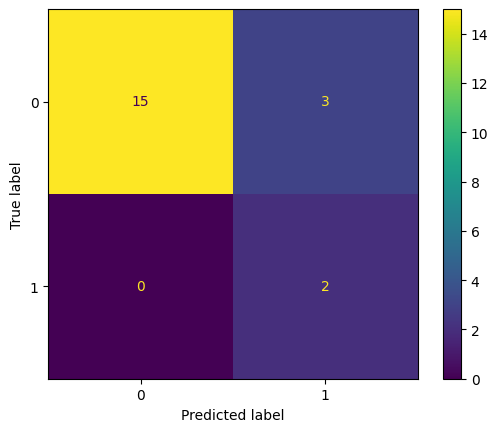

In [71]:
# Compute predictions and evaluation metrics using the best estimator
# original data
y_pred = best_clf.predict(X_test['tokenized_text'])
print(classification_report(y_test, y_pred))

cm= ConfusionMatrixDisplay.from_estimator(best_clf, X_test['tokenized_text'], y_test)